In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# B1.1 Relevance - ONE SHOT

## Notebook to evaluate GPT-annotate results - HLS speeches for relevance

Codebooks:
- B1.0: zero shot
- B1.1: one shot
- B1.0.1: zero shot with specific inclusion of context
- B1.1.1: one shot with specific inclusion of context

Test for 5 different seeds [3644,3441, 280, 5991, 7917]
> Refer to these as S1-5

Batch of 20 sentences
1 Iteration.

Main outcomes: T0 - I1
For testing purposes: (T 0.6 I1 - T 0 I3)

FINGERPRINT USED: fp_43dfabdef1


In [3]:
# Basic stats of train dataset:
HLS_train = pd.read_csv('data/string/HLS_train_string.csv')

In [4]:
HLS_train

,id,Text,Relevance,Principle,Topic,Unit,Shape,RELEVANCE,PRINCIPLE,TOPIC,UNIT,SHAPE
0,COP19_japan,"Thank you, Mr. President .",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1,COP19_japan,"On beha lf of the government of Japan , I wou...",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
2,COP19_japan,I would also like to expr ess my d eepest con...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
3,COP19_japan,Mr. President: A fair and effective framewor...,2,3,1,2,2,Relevant,utilitarian,new UNFCCC policy,responsibility,equality
4,COP19_japan,"In this regard, Japan firmly supports the est...",1,0,0,0,0,Statement of intent,not evaluated,not evaluated,not evaluated,not evaluated
...,...,...,...,...,...,...,...,...,...,...,...,...
1207,COP28_newzealand,New Zealand is proud to suppor t several impo...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1208,COP28_newzealand,"I am joined by New Zealand’s largest business,...",0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1209,COP28_newzealand,The commitment o f New Zealanders from across ...,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated
1210,COP28_newzealand,Thank you Mr President.,0,0,0,0,0,Not relevant,not evaluated,not evaluated,not evaluated,not evaluated


# 1. Results B1.1

In [5]:
#B1.0
path_B1 = 'STRING_RESULT/B1.1/all_iterations'

# Open all dataframes
S1 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_3644.csv')
S2 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_3441.csv')
S3 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_280.csv')
S4 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_5991.csv')
S5 = pd.read_csv(f'{path_B1}/all_iterations_string_T0_7917.csv')

seeds_B1 = {
    "S1": [S1],
    "S2": [S2],
    "S3": [S3],
    "S4": [S4],
    "S5": [S5]
}

### 2. Evaluate missed batches

In [6]:
# Evaluate missed batches
B1_missed = pd.read_csv('STRING_RESULT/B1.1/T0_missed_batches.csv')
B1_missed

,Unnamed: 0,Missed batch
0,0,3644 - I1 - B24
1,1,3441 - I1 - B1
2,2,3441 - I1 - B15
3,3,3441 - I1 - B31
4,4,3441 - I1 - B32
5,5,3441 - I1 - B46
6,6,280 - I1 - B7
7,7,280 - I1 - B20
8,8,280 - I1 - B22
9,9,280 - I1 - B23


S1: 1 batch (20 sentences) missed
S2: 5 batches (100 sentences) missed
S3: 4 batches (80 sentences) missed
S4: 6 batches (120 sentences) missed
S5: 5 batches (100 sentences) missed

The fact that batches are missed must be taken into account when evaluating accuracy and performance.

> let op: laatste batch heeft minder zinnen

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [7]:
print(classification_report(S1['RELEVANCE_x'],S1['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.62      0.75       770
           Relevant       0.38      0.76      0.51       217
Statement of intent       0.46      0.58      0.51       205

           accuracy                           0.64      1192
          macro avg       0.60      0.65      0.59      1192
       weighted avg       0.76      0.64      0.66      1192



In [8]:
print(classification_report(S2['RELEVANCE_x'],S2['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.62      0.75       722
           Relevant       0.39      0.81      0.53       196
Statement of intent       0.48      0.57      0.52       194

           accuracy                           0.64      1112
          macro avg       0.60      0.67      0.60      1112
       weighted avg       0.76      0.64      0.67      1112



In [9]:
print(classification_report(S3['RELEVANCE_x'],S3['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.62      0.75       745
           Relevant       0.39      0.82      0.53       202
Statement of intent       0.45      0.54      0.49       185

           accuracy                           0.64      1132
          macro avg       0.59      0.66      0.59      1132
       weighted avg       0.76      0.64      0.67      1132



In [10]:
print(classification_report(S4['RELEVANCE_x'],S4['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.95      0.61      0.74       709
           Relevant       0.37      0.82      0.51       184
Statement of intent       0.47      0.55      0.51       179

           accuracy                           0.64      1072
          macro avg       0.60      0.66      0.59      1072
       weighted avg       0.77      0.64      0.67      1072



In [11]:
print(classification_report(S5['RELEVANCE_x'],S5['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.60      0.74       734
           Relevant       0.39      0.80      0.53       206
Statement of intent       0.45      0.56      0.50       180

           accuracy                           0.63      1120
          macro avg       0.59      0.66      0.59      1120
       weighted avg       0.76      0.63      0.66      1120



In [12]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1, S2, S3, S4, S5]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['RELEVANCE_x'], df['RELEVANCE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.744338   0.942184  0.615183
Relevant             0.520701   0.385648  0.801844
Statement of intent  0.506200   0.463093  0.558388
accuracy             0.638963   0.638963  0.638963
macro avg            0.590413   0.596975  0.658472
weighted avg         0.664587   0.762690  0.638963

Standard Deviation of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.004921   0.003610  0.006297
Relevant             0.008626   0.008049  0.021514
Statement of intent  0.011856   0.013143  0.015389
accuracy             0.004006   0.004006  0.004006
macro avg            0.004738   0.004128  0.005150
weighted avg         0.003695   0.004372  0.004006


In [13]:
print(mean_df)

                     f1-score  precision    recall
index                                             
Not relevant         0.744338   0.942184  0.615183
Relevant             0.520701   0.385648  0.801844
Statement of intent  0.506200   0.463093  0.558388
accuracy             0.638963   0.638963  0.638963
macro avg            0.590413   0.596975  0.658472
weighted avg         0.664587   0.762690  0.638963


Metrics over 5 seeds are very similar.
Macro avg: average of all classes (aka labels)
Weighted avg: weighted average, taking class balances into account.

## 3. Confusion matrix
Evaluate where misclassifications are found - Again for each seed.

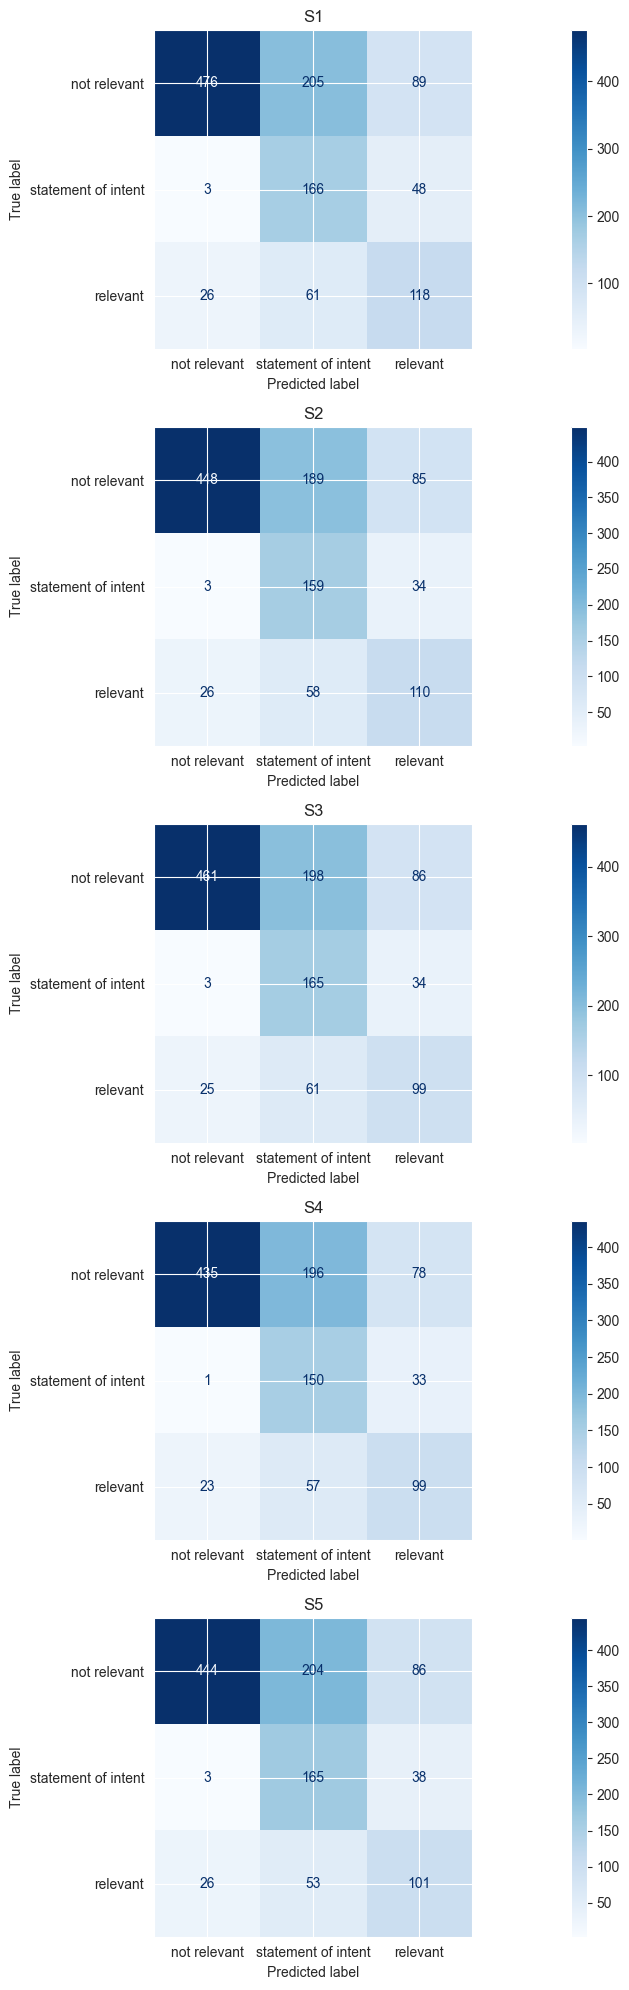

In [14]:
labels = ['not relevant', 'statement of intent', 'relevant']

# Number of plots
num_plots = len(seeds_B1)
# Create plot names
plot_names = list(seeds_B1.keys())

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 20))

# Visualize the confusion matrix
for i, name in enumerate(plot_names):
    df = seeds_B1[name][0]  # Access the dataframe
    cm = confusion_matrix(df['RELEVANCE_x'], df['RELEVANCE_y'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(name)

# Adjust layout
plt.tight_layout()
plt.show()

## 4. Evaluate misclassifications of sentences
Special interest in relevant sentences that are incorrectly classified. Evaluate if the same sentences are misclassified in each seed

In [38]:
# Test label and seed nr to all dataframes
B1 = [S1, S2, S3, S4, S5]

# Corresponding seed numbers
label =  ['S1 3644','S2 3441','S3 280', 'S4 5991', 'S5 7917']

# Adding the seed number column to each dataframe
for i, df in enumerate(B1):
    df['Seed'] = label[i]

In [57]:
B1_all = pd.concat([S1, S2, S3, S4, S5], axis=0, ignore_index=True)
B1_all_sorted = B1_all.sort_values('unique_id')
B1_all_sorted.shape

(5628, 7)

In [93]:
# I want to evaluate consistency
# Print all rows where inconsequences are found per seed
# Define a function to check if all values in relevance_y are the same
def relevance_y_not_uniform(group):
    return group['RELEVANCE_y'].nunique() != 1

# Group by 'ID' and filter groups
B1_consistency = B1_all_sorted.groupby('unique_id').filter(relevance_y_not_uniform)

print("\nFiltered DataFrame (where relevance_y is not the same for all rows within each unique ID):")
B1_consistency.shape


Filtered DataFrame (where relevance_y is not the same for all rows within each unique ID):


(490, 7)

In [55]:
# Count unique values in Unique_id column of B1 consistency to see how many sentences are inconsistently labelled
print('There are inconsistent labels given for', len(B1_consistency['unique_id'].unique()), 'sentences.')

There are inconsistent labels given for 106 sentences.


In [81]:
# Evaluate texts that are labelled inconsistently and wrong
condition = B1_consistency['RELEVANCE_x'] != B1_consistency['RELEVANCE_y']

# Count the number of True values in the condition
B1_consistency_incorrect = B1_consistency[condition]
B1_consistency_incorrect

,unique_id,text,RELEVANCE_x,llm_query,RELEVANCE_y,iteration,Seed
3,3,Mr. President: A fair and effective framewor...,Relevant,3 Mr. President: A fair and effective framew...,Statement of intent,1,S1 3644
4520,12,This target may appear to be less ambitious.,Not relevant,12 This target may appear to be less ambitiou...,Statement of intent,1,S5 7917
3448,32,We will provide support to developing countri...,Statement of intent,32 We will provide support to developing coun...,Not relevant,1,S4 5991
2336,32,We will provide support to developing countri...,Statement of intent,32 We will provide support to developing coun...,Not relevant,1,S3 280
3463,47,It is for this reason that Namibia and Africa ...,Not relevant,47 It is for this reason that Namibia and Afri...,Relevant,1,S4 5991
...,...,...,...,...,...,...,...
3388,1164,"In other climate action, research at the Aqab...",Not relevant,"1164 In other climate action, research at the...",Statement of intent,1,S3 280
5625,1197,We back the 2050 strategy for the Blue Pacific...,Statement of intent,1197 We back the 2050 strategy for the Blue Pa...,Relevant,1,S5 7917
1177,1197,We back the 2050 strategy for the Blue Pacific...,Statement of intent,1197 We back the 2050 strategy for the Blue Pa...,Relevant,1,S1 3644
3421,1197,We back the 2050 strategy for the Blue Pacific...,Statement of intent,1197 We back the 2050 strategy for the Blue Pa...,Relevant,1,S3 280


In [95]:
condition = (B1_consistency['RELEVANCE_x']=='Relevant') & (B1_consistency['RELEVANCE_y']=='Statement of intent')

condition2 = (B1_consistency['RELEVANCE_x']=='Relevant') & (B1_consistency['RELEVANCE_y']=='Not relevant')

print('Relevant as SOI', condition.sum())
print('Relevant as not relevant', condition2.sum())

Relevant as SOI 47
Relevant as not relevant 5


In 80 van de inconsistent zinnen is meer dan 1 label incorrect. Dus niet een toevallige inconsistency.

Evaluate the wrong classifications even more, see how things are classified. For this purpose, create a confusionmatrix

In [83]:
# Define the condition for row-by-row comparison - how many times is relevant labelled as not relevant - in inconsistent sentences
condition = (B1_consistency_incorrect['RELEVANCE_x'] == "Relevant") & (B1_consistency_incorrect['RELEVANCE_y'] == "Not relevant")
count_mismatches = condition.sum()
print('The number of times relevant sentences, that are also inconsistently labelled over the seeds, are labelled as Not relevant:',count_mismatches)

The number of times relevant sentences, that are also inconsistently labelled over the seeds, are labelled as Not relevant: 5


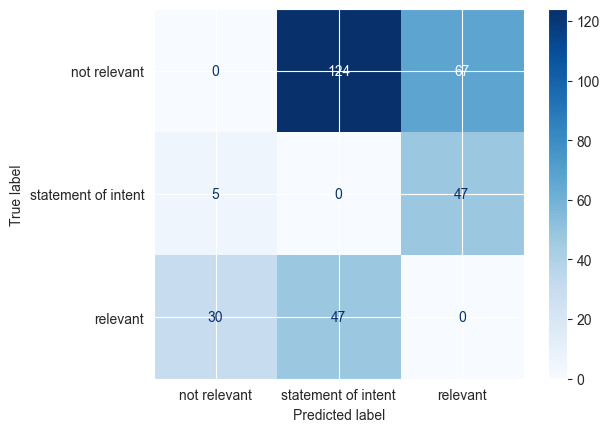

In [84]:
cm = confusion_matrix(B1_consistency['RELEVANCE_x'], B1_consistency['RELEVANCE_y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)


Not relevant sentences are labelled as relevant in 67 of the inconsistent instances - Belangrijkste edge cases in gevallen waar relevant verkeerd is gelabeled.

In [86]:
B1_consistency_incorrect["RELEVANCE_x"].value_counts()

Not relevant           191
Statement of intent     77
Relevant                52
Name: RELEVANCE_x, dtype: int64

Mostly not-relevant sentences are labelled incorrectly,

# 2. Results B1.1.1 - one shot with context

In [19]:
#B1.0
path_B111 = 'STRING_RESULT/B1.1.1/all_iterations'

# Open all dataframes
S1_111 = pd.read_csv(f'{path_B111}/all_iterations_string_T0_3644.csv')
S2_111 = pd.read_csv(f'{path_B111}/all_iterations_string_T0_3441.csv')
S3_111 = pd.read_csv(f'{path_B111}/all_iterations_string_T0_280.csv')
S4_111 = pd.read_csv(f'{path_B111}/all_iterations_string_T0_5991.csv')
S5_111 = pd.read_csv(f'{path_B111}/all_iterations_string_T0_7917.csv')

seeds_B111 = {
    "S1": [S1_111],
    "S2": [S2_111],
    "S3": [S3_111],
    "S4": [S4_111],
    "S5": [S5_111]
}

### 2. Evaluate missed batches

In [20]:
# Evaluate missed batches
B111_missed = pd.read_csv('STRING_RESULT/B1.1.1/T0_missed_batches.csv')
B111_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B4
1,1,3441 - I1 - B5
2,2,3441 - I1 - B6
3,3,3441 - I1 - B27
4,4,3441 - I1 - B30
5,5,3441 - I1 - B37
6,6,3441 - I1 - B45
7,7,280 - I1 - B13
8,8,280 - I1 - B15
9,9,280 - I1 - B38


S1: 2 batches (40 sentences) missed
S2: 2 batches (40 sentences) missed
S3: 4 batches (80 sentences) missed
S4: 1 batch (20 sentences) missed
S5: 4 batches (80 sentences) missed

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [21]:
print(classification_report(S1_111['RELEVANCE_x'],S1_111['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.58      0.71       773
           Relevant       0.36      0.83      0.50       212
Statement of intent       0.49      0.53      0.51       207

           accuracy                           0.61      1192
          macro avg       0.59      0.65      0.57      1192
       weighted avg       0.75      0.61      0.64      1192



In [22]:
print(classification_report(S2_111['RELEVANCE_x'],S2_111['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.93      0.58      0.72       679
           Relevant       0.36      0.85      0.50       181
Statement of intent       0.51      0.51      0.51       192

           accuracy                           0.62      1052
          macro avg       0.60      0.65      0.58      1052
       weighted avg       0.76      0.62      0.64      1052



In [23]:
print(classification_report(S3_111['RELEVANCE_x'],S3_111['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.58      0.72       745
           Relevant       0.37      0.85      0.51       205
Statement of intent       0.50      0.54      0.52       202

           accuracy                           0.62      1152
          macro avg       0.60      0.66      0.58      1152
       weighted avg       0.76      0.62      0.65      1152



In [24]:
print(classification_report(S4_111['RELEVANCE_x'],S4_111['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.94      0.59      0.73       772
           Relevant       0.37      0.83      0.51       215
Statement of intent       0.48      0.54      0.51       205

           accuracy                           0.62      1192
          macro avg       0.60      0.65      0.58      1192
       weighted avg       0.76      0.62      0.65      1192



In [25]:
print(classification_report(S5_111['RELEVANCE_x'],S5_111['RELEVANCE_y']))

                     precision    recall  f1-score   support

       Not relevant       0.95      0.59      0.73       761
           Relevant       0.37      0.81      0.51       212
Statement of intent       0.47      0.55      0.51       199

           accuracy                           0.62      1172
          macro avg       0.60      0.65      0.58      1172
       weighted avg       0.76      0.62      0.65      1172



In [26]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1_111, S2_111, S3_111, S4_111, S5_111]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['RELEVANCE_x'], df['RELEVANCE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df2 = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df2)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.720285   0.939108  0.584175
Relevant             0.507632   0.364990  0.833837
Statement of intent  0.510929   0.489423  0.535130
accuracy             0.619911   0.619911  0.619911
macro avg            0.579615   0.597840  0.651047
weighted avg         0.645918   0.758549  0.619911

Standard Deviation of each metric:
                     f1-score  precision    recall
index                                             
Not relevant         0.005121   0.005402  0.005154
Relevant             0.006908   0.007472  0.017984
Statement of intent  0.005951   0.015323  0.015778
accuracy             0.004351   0.004351  0.004351
macro avg            0.004338   0.003753  0.004790
weighted avg         0.004087   0.002879  0.004351


In [27]:
print(mean_df2)

                     f1-score  precision    recall
index                                             
Not relevant         0.720285   0.939108  0.584175
Relevant             0.507632   0.364990  0.833837
Statement of intent  0.510929   0.489423  0.535130
accuracy             0.619911   0.619911  0.619911
macro avg            0.579615   0.597840  0.651047
weighted avg         0.645918   0.758549  0.619911
